In [45]:
import glob

In [46]:
reproduction = ['./REST-reproduction',
                './SP1-reproduction',
                './ELK1-reproduction',
                './MYC-reproduction',
                './USF1-reproduction',
                './ZBTB7A-reproduction',
                './ARID3A-reproduction',
                './GABPA-reproduction',
                './CTCFL-reproduction']

In [47]:
all_train_bce = {}
all_train_rest = {}
TF_NAMES = []

for tf_path in reproduction:

    TF_name = tf_path.split('-')[0].split('/')[1]
    TF_NAMES.append(TF_name)

    data_path = [] 
    exp_num = 72
    num_epoch = 100

    for exp_idx in range(exp_num):
        for file in glob.glob(tf_path + '/train/{}.txt'.format(exp_idx)):
            data_path.append(file)

    tf_train_res = {}
    for exp_idx in range(exp_num):
        f = open(data_path[exp_idx], 'r')
        data = f.read()
        tf_train_res[exp_idx] = data
        f.close()

    tf_train_mean_res_bce = {}
    tf_train_mean_res_rest = {}
    for exp_idx in range(exp_num):
        temp_model1 = tf_train_res[exp_idx].split('Model ')[1:][0].split('\n')[1:-1]
        temp_model2 = tf_train_res[exp_idx].split('Model ')[1:][1].split('\n')[1:-1]
        temp_model3 = tf_train_res[exp_idx].split('Model ')[1:][2].split('\n')[1:-1]

        temp_bce1 = [float(item.split(':')[1].split("+")[0]) for item in temp_model1]
        temp_rest1 = [float(item.split(':')[1].split("+")[1]) for item in temp_model1]
        temp_bce2 = [float(item.split(':')[1].split("+")[0]) for item in temp_model2]
        temp_rest2 = [float(item.split(':')[1].split("+")[1]) for item in temp_model2]
        temp_bce3 = [float(item.split(':')[1].split("+")[0]) for item in temp_model3]
        temp_rest3 = [float(item.split(':')[1].split("+")[1]) for item in temp_model3]

        temp_mean_bce = [sum(value)/3 for value in zip(temp_bce1, temp_bce2, temp_bce3)]
        temp_mean_rest = [sum(value)/3 for value in zip(temp_rest1, temp_rest2, temp_rest3)]

        tf_train_mean_res_bce[exp_idx] = temp_mean_bce
        tf_train_mean_res_rest[exp_idx] = temp_mean_rest

    temp_tf_train_mean_bce = []
    temp_tf_train_mean_rest = []

    temp_sum_tf_train_mean_bce = []
    temp_sum_tf_train_mean_rest = []

    for epoch in range(num_epoch):
        temp_sum_bce = 0
        temp_sum_rest = 0
        for exp_idx in range(exp_num):
            temp_sum_bce += tf_train_mean_res_bce[exp_idx][epoch]
            temp_sum_rest += tf_train_mean_res_rest[exp_idx][epoch]

        temp_sum_tf_train_mean_bce.append(temp_sum_bce)
        temp_sum_tf_train_mean_rest.append(temp_sum_rest)

    tf_train_mean_bce = [item/exp_num for item in temp_sum_tf_train_mean_bce]
    tf_train_mean_rest = [item/exp_num for item in temp_sum_tf_train_mean_rest]

    all_train_bce[TF_name] = tf_train_mean_bce
    all_train_rest[TF_name] = tf_train_mean_rest

In [48]:
import matplotlib.pyplot as plt

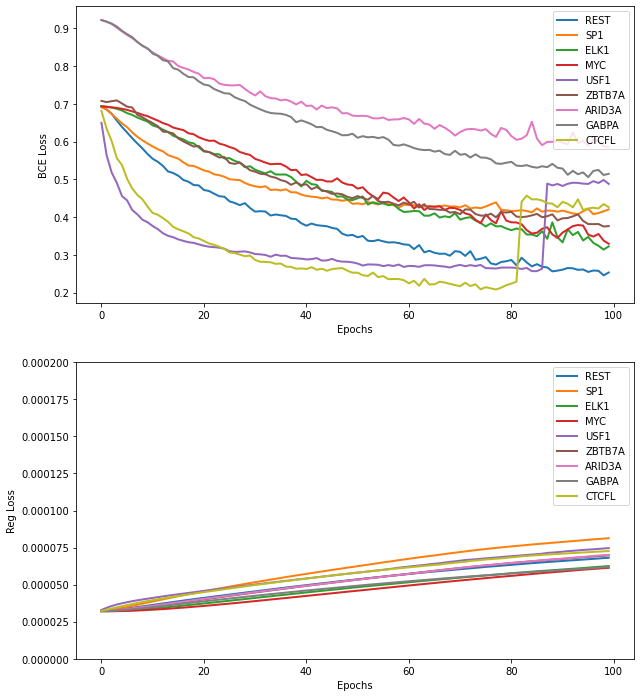

In [61]:
plt.figure(figsize = (10,12))
plt.subplot(2,1,1)
for tf_name in TF_NAMES:
    plt.plot(all_train_bce[tf_name], label=tf_name, linewidth=2)
plt.legend(fontsize=10)
plt.xlabel('Epochs')
plt.ylabel('BCE Loss')

plt.subplot(2,1,2)
for tf_name in TF_NAMES:
    plt.plot(all_train_rest[tf_name], label=tf_name, linewidth=2)
plt.legend(fontsize=10)
plt.ylim(0, 0.0002)
plt.xlabel('Epochs')
plt.ylabel('Reg Loss')
plt.savefig("./stl_loss.png")
plt.show()
plt.close()


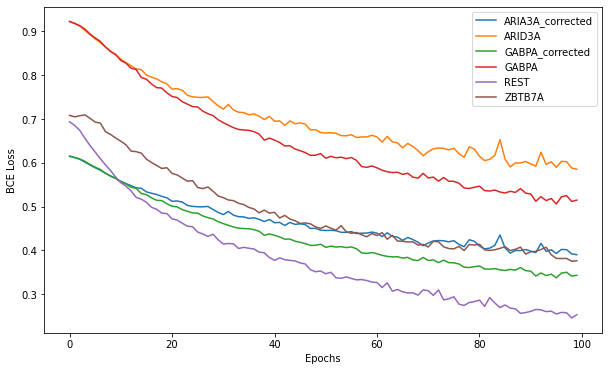

In [62]:
plt.figure(figsize=(10, 6))
plt.plot([i/1.5 for i in all_train_bce['ARID3A']], label='ARIA3A_corrected')
plt.plot(all_train_bce['ARID3A'], label = 'ARID3A')
plt.plot([i/1.5 for i in all_train_bce['GABPA']], label = 'GABPA_corrected')
plt.plot(all_train_bce['GABPA'], label = 'GABPA')
plt.plot(all_train_bce['REST'], label = 'REST')
plt.plot(all_train_bce['ZBTB7A'], label = 'ZBTB7A')
plt.ylabel('BCE Loss')
plt.xlabel('Epochs')
plt.legend(fontsize=10)
plt.savefig('./stl_loss_corrected.png')
plt.show()
plt.close()